In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data=pd.DataFrame.from_csv('https://s3-ap-southeast-2.amazonaws.com/vibrato-data-test-public-datasets-01/world-food-facts.zip',sep='\t')
#data=pd.DataFrame.from_csv('en.openfoodfacts.org.products.tsv',sep='\t')

/home/keny/ML/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
/home/keny/ML/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [46]:
pd.options.display.max_columns=170
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)
data.head(4)


,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,Missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,NaN,NaN

In [4]:

print(data.columns.sort_values(ascending=True))
print(data.info())
print(data.count()) # There seems to be a lot of missing values


Index(['-alpha-linolenic-acid_100g', '-arachidic-acid_100g', '-arachidonic-acid_100g', '-behenic-acid_100g', '-butyric-acid_100g', '-capric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g', '-cerotic-acid_100g', '-dihomo-gamma-linolenic-acid_100g',
       ...
       'vitamin-b2_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-c_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-pp_100g', 'water-hardness_100g', 'zinc_100g'], dtype='object', length=161)
<class 'pandas.core.frame.DataFrame'>
Index: 333824 entries, 0000000003087 to 999990026839
Columns: 161 entries, url to water-hardness_100g
dtypes: float64(106), object(55)
memory usage: 412.6+ MB
None
url                                           333800
creator                                       333822
created_t                                     333821
created_datetime                              333815
last_modified_t                               333824
last_modified_datetime                        

Looking at the Missing Values

In [5]:
data_missing=data.isna().sum().sort_values(ascending=False)
print(data_missing/len(data)*100)


water-hardness_100g                           100.000000
no_nutriments                                 100.000000
-lignoceric-acid_100g                         100.000000
-cerotic-acid_100g                            100.000000
-melissic-acid_100g                           100.000000
glycemic-index_100g                           100.000000
-elaidic-acid_100g                            100.000000
-mead-acid_100g                               100.000000
-erucic-acid_100g                             100.000000
-nervonic-acid_100g                           100.000000
-caproic-acid_100g                            100.000000
-butyric-acid_100g                            100.000000
nutrition_grade_uk                            100.000000
ingredients_from_palm_oil                     100.000000
ingredients_that_may_be_from_palm_oil         100.000000
chlorophyl_100g                               100.000000
-palmitic-acid_100g                            99.999700
-stearic-acid_100g             

Taking a closer look at the data

In [6]:
#To check which columns have more than Threshold %of data that is NA
def getmissingdata(dataset,percentage):
    missingvalues = data.loc[:, data.isnull().mean() >= percentage/100]
    return(missingvalues)

print('Number of Columns whose missing values are 100% ::',len(getmissingdata(data,100).columns))
print('Number of Columns whose missing values are 99% and Above ::',len(getmissingdata(data,99).columns)) 

Number of Columns whose missing values are 100% :: 16
Number of Columns whose missing values are 99% and Above :: 74


Visualisation

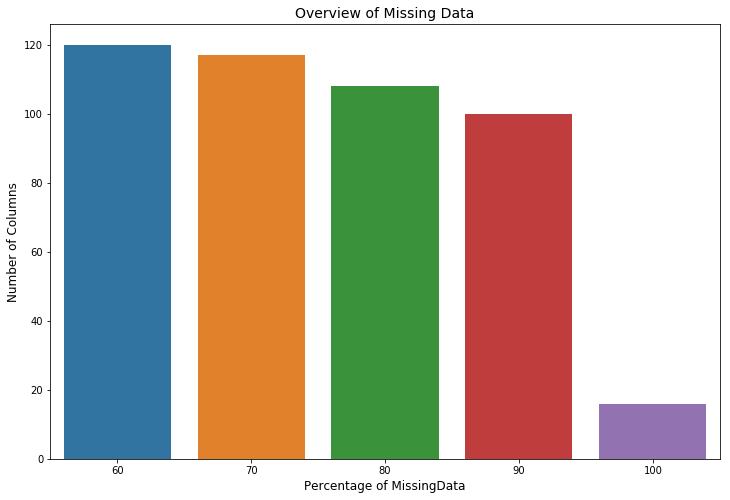

In [7]:
missing_60percent=len(getmissingdata(data,60).columns)
missing_70percent=len(getmissingdata(data,70).columns)
missing_80percent=len(getmissingdata(data,80).columns)
missing_90percent=len(getmissingdata(data,90).columns)
missing_100percent=len(getmissingdata(data,100).columns)
mis=[missing_60percent,missing_70percent,missing_80percent,missing_90percent,missing_100percent]
perc=[60,70,80,90,100]
misdata=list(zip(perc,mis))
missing_data=pd.DataFrame(misdata,columns=['Percentageofmissingdata','numberofcolumns'])
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(x = missing_data.Percentageofmissingdata,y = missing_data.numberofcolumns)
plt.title("Overview of Missing Data",fontsize = 14)
plt.xlabel('Percentage of MissingData',fontsize = 12)
plt.ylabel('Number of Columns',fontsize = 12)
plt.show()


Looking in to the Index and ensuring it is inplace before the Filtering operations are carried on.



In [8]:
print(data.index.name)
if data.index.name is not None:
    data.reset_index(inplace=True)
print(len(data['code'].unique()))
print(len(data))
print(any(data['code'].duplicated()))
print(data['code'].isna().sum())
data['code'].fillna(0,inplace=True) # Imputing with zeros so that it could used as index
data['code'].value_counts()
data.set_index('code', drop=True, append=False, inplace=True, verify_integrity=False) # Make 'code' as Index
print(data.index.name)

code
333801
333824
True
24
code


Question 1:List the Top 5 Peanut Butters based in Australia and sorted them by highest Energy content per 100g

In [9]:
#Checking the Countries and products to get the right match - Commenting as the o.p is huge
#print(data.groupby('countries').size().sort_values(ascending=False))
#print(data['product_name'].value_counts().sort_values(ascending=False))
#data[['product_name','brands','energy_100g']].fillna(0.00000001,inplace=True)# Imputing before grouping by
data_Aus_PeanutButter = data[(data['countries']=='Australia') & (data['product_name'].str.contains('Peanut Butter',case=False))]
Q1=data_Aus_PeanutButter.groupby(['energy_100g','brands','product_name']).size().sort_values(ascending=False)
print(Q1)


energy_100g  brands                                                            product_name                                     
2670.0       Coles,Sanitarium                                                  Peanut Butter Crunchy - No added Salt                1
2600.0       The Forage Company,The Ridiculously Delicious Nut Butter Company  Ridiculously Delicious Peanut Butter Super Smooth    1
2560.0       sanitarium                                                        natural peanut butter crunchy                        1
2530.0       Bramwells,Aldi                                                    Bramwells Peanut Butter Crunchy                      1
2470.0       Bramwells,Aldi                                                    Bramwells American Style Peanut Butter               1
2380.0       Coles                                                             Smooth Peanut Butter                                 1
397.0        OAK                                                   

Visualisation

Index(['energy_100g', 'brands', 'product_name', 0], dtype='object')


/home/keny/ML/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


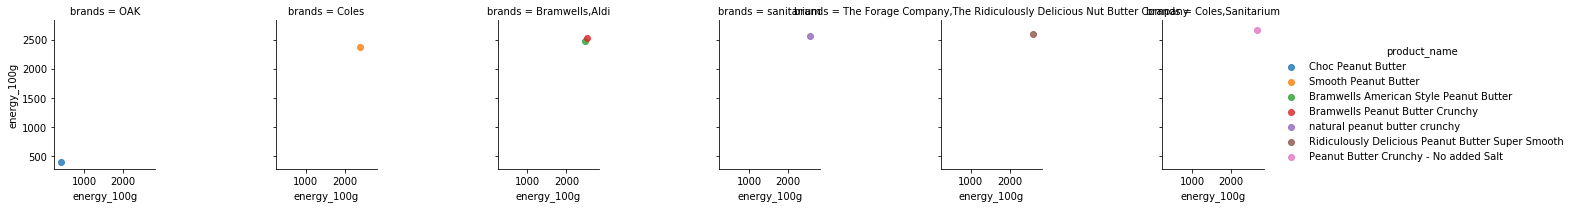

In [10]:
DF=data_Aus_PeanutButter.groupby(['energy_100g','brands','product_name']).size().reset_index()
#Q1.plot.bar(y='energy_100g',x='product_name')
print(DF.columns)
sns.lmplot('energy_100g','energy_100g', hue="product_name",col="brands",data=DF,fit_reg=False,size=3)


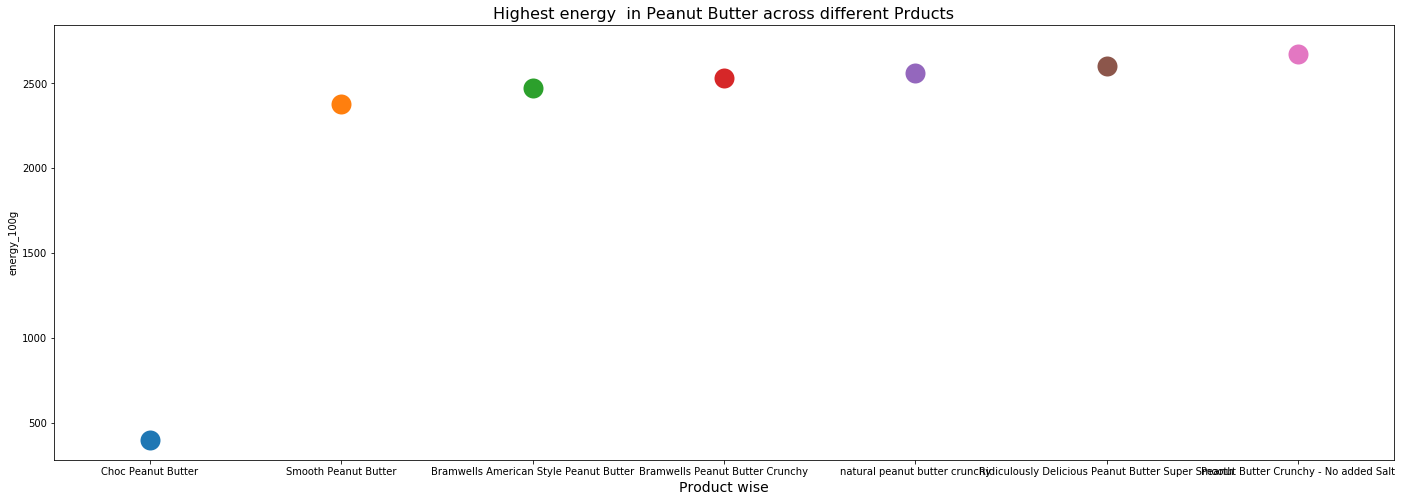

In [11]:
plt.figure(figsize = (24,8))
c=sns.swarmplot(x='product_name', y="energy_100g", data=DF,size=20)
c.set_title('Highest energy  in Peanut Butter across different Prducts',fontsize = 16)
c.set_xlabel("Product wise",fontsize=14)
plt.show()


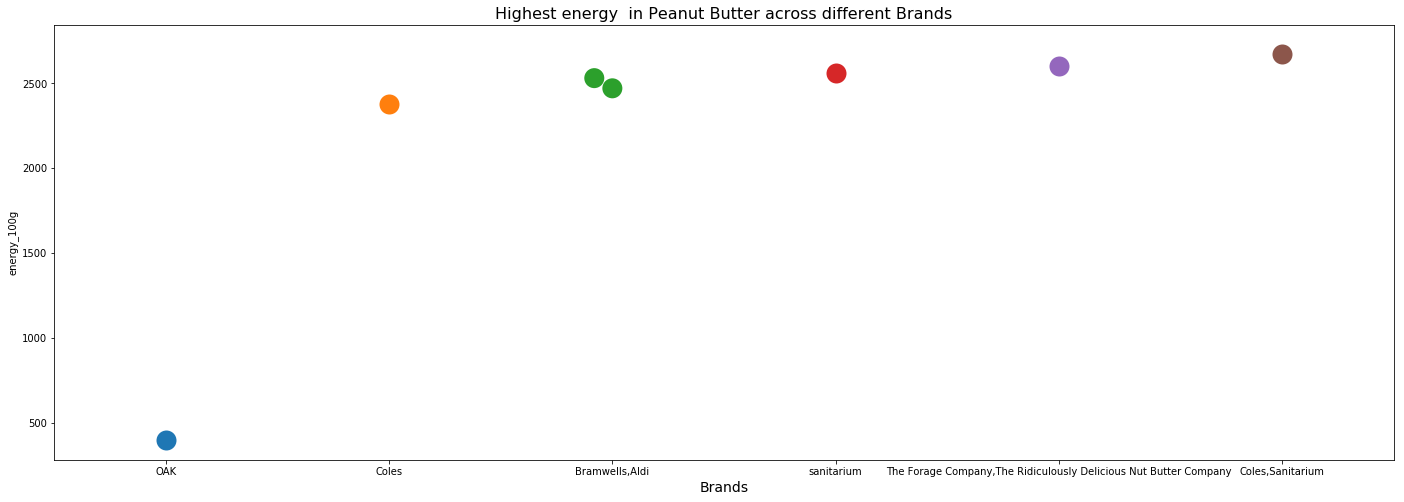

In [12]:
plt.figure(figsize = (24,8))
c=sns.swarmplot(x='brands', y="energy_100g", data=DF,size=20)
c.set_title('Highest energy  in Peanut Butter across different Brands',fontsize = 16)
c.set_xlabel("Brands",fontsize=14)
plt.show()


Question 2: 
List the Top 10 Countries together with the number of products with Zinc content above ‘0.001’ and that have more than one product

In [13]:
print(data[(data['zinc_100g']>.001)].groupby('countries_tags')['product_name'].size().sort_values(ascending=False).head(10))
print(data[(data['zinc_100g']>.001)].groupby(['countries','product_name']).size().sort_values(ascending=False).head(10))

countries_tags
en:united-states              2777
en:france                      149
en:switzerland                  58
en:germany                      42
en:spain                        10
en:canada                       10
en:belgium,en:france             6
en:russia                        5
en:netherlands                   5
en:france,en:united-states       5
Name: product_name, dtype: int64
countries  product_name                                                 
US         Raisin Bran Cereal                                               25
           Protein Bar                                                      23
           Nutrition Bar                                                    19
           Sweetened Corn & Oat Cereal                                      19
           Potato Chips                                                     14
           Toasted Oats                                                     13
           Lightly Sweetened Whole Grain Wheat Cereal  

Visulisation

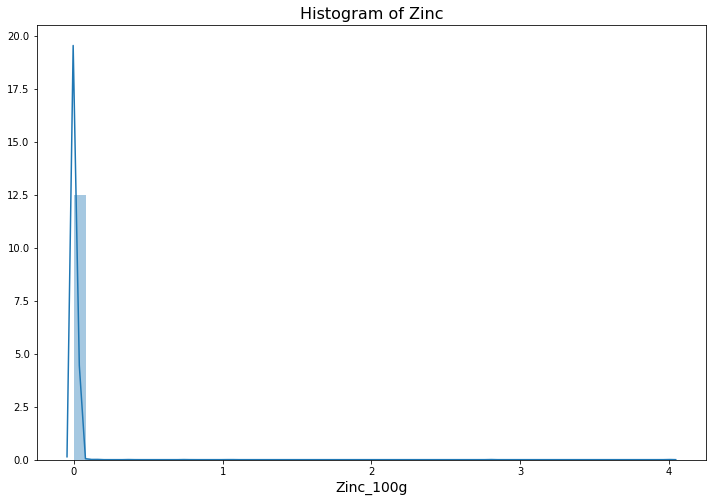

In [14]:
np.seterr(all=None, divide=None, over=None, under=None, invalid=None)
zincdata=data.copy()
zincdata['zinc_100g'].fillna(0,inplace=True)
subset = zincdata[zincdata['zinc_100g']>0]['zinc_100g']
plt.figure(figsize = (12,8))
b = sns.distplot(subset)
b.set_title('Histogram of Zinc',fontsize = 16)
b.set_xlabel("Zinc_100g",fontsize=14)
plt.show()

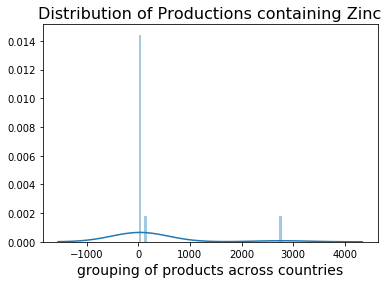

In [15]:


zinc_data=data[(data['zinc_100g']>.001)].groupby('countries_tags')['product_name'].size().sort_values(ascending=False).head(10)
a=sns.distplot(zinc_data,kde=True,norm_hist=True,bins=50)
a.set_title('Distribution of Productions containing Zinc',fontsize = 16)
a.set_xlabel("grouping of products across countries",fontsize=14)
plt.show()

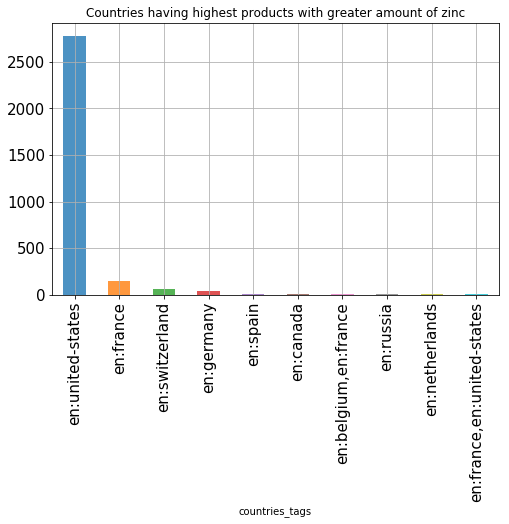

In [16]:
zinc_data.plot(kind='bar',figsize=(8,5),alpha = 0.8,fontsize=15)
plt.title('Countries having highest products with greater amount of zinc')
plt.grid()
plt.show()

Question3: Grouping product categories by those that contain Chicken, Pork and Tofu list their Average, Median and Standard DeviationProtein content per 100g, 
    excluding data that is not available (NaN)

In [17]:
data['categories_en'].fillna('Missing',inplace=True)
#Subroutine to check for specific content in each ingredient
def check_ingredients(category):
    cat=''
    category=str(category).lower()
    if 'chicken' in category.lower() and 'tofu' in category.lower() and 'pork' in category.lower():
        cat='All'
    elif 'tofu' in category.lower():
        cat='tofu'
    elif 'pork' in category.lower():
        cat='pork'
    elif 'chicken' in category.lower():
        cat='chicken'
    elif 'chicken' in category.lower() and 'pork' in category.lower():
        cat='chicken&pork'   
    else:
        cat='other'
    return cat
        
#Creating a new category based on the Function
meatdata=pd.DataFrame(data[['categories_en','proteins_100g']])
meatdata['created_category'] = meatdata['categories_en'].apply(check_ingredients)
meatdata['created_category'].value_counts()



other      331412
chicken      1259
pork          982
tofu          171
Name: created_category, dtype: int64

In [18]:
#listing the stats
print('Mean stats \n',meatdata.groupby('created_category')['proteins_100g'].mean())
print('Standard Deviation stats \n',meatdata.groupby('created_category')['proteins_100g'].std())
print('Median stats \n',meatdata.groupby('created_category')['proteins_100g'].median())


Mean stats 
 created_category
chicken    13.741947
other       7.048942
pork       15.854125
tofu       13.441646
Name: proteins_100g, dtype: float64
Standard Deviation stats 
 created_category
chicken    6.693535
other      8.435053
pork       6.937204
tofu       4.368066
Name: proteins_100g, dtype: float64
Median stats 
 created_category
chicken    12.30
other       4.71
pork       17.00
tofu       14.00
Name: proteins_100g, dtype: float64


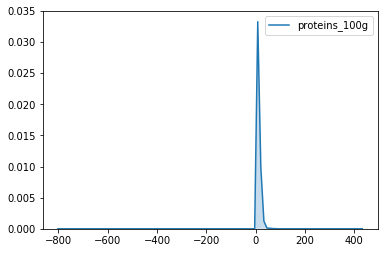

In [19]:
meat_data=meatdata.copy()
meat_data['proteins_100g'].fillna(0,inplace=True)
sns.kdeplot(meat_data['proteins_100g'],shade=True)

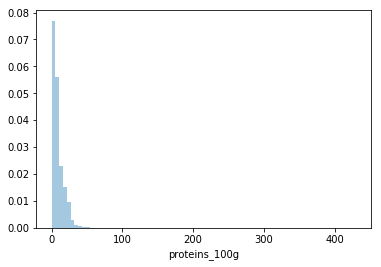

In [20]:
subset_ = meat_data[meat_data['proteins_100g']>0]['proteins_100g']
sns.distplot(subset_,kde=False,norm_hist=True,bins=80)

Text(0,0.5,'Density')

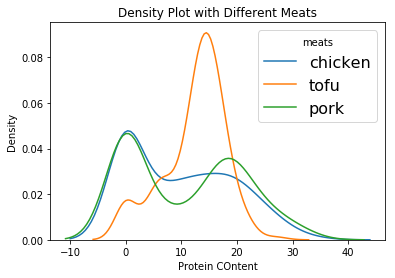

In [43]:
chicken_data=[]
tofu_data=[]
pork_data=[]
for index,row in meat_data.iterrows():
    if row['created_category']=='chicken':
        chicken_data.append(row['proteins_100g'])
    elif row['created_category']=='tofu':
        tofu_data.append(row['proteins_100g'])
    elif row['created_category']=='pork':
        pork_data.append(row['proteins_100g'])
td=list(zip(chicken_data,tofu_data,pork_data)) 
df=pd.DataFrame(td,columns=['chicken','tofu','pork'])
meats=list(df.columns)
for i,meat in enumerate(meats):
    sns.distplot(df[meat],kde=True,hist=False,bins=20,label=meat)
plt.legend(prop={'size': 16}, title = 'meats')
plt.title('Density Plot with Different Meats')
plt.xlabel('Protein COntent')
plt.ylabel('Density')  


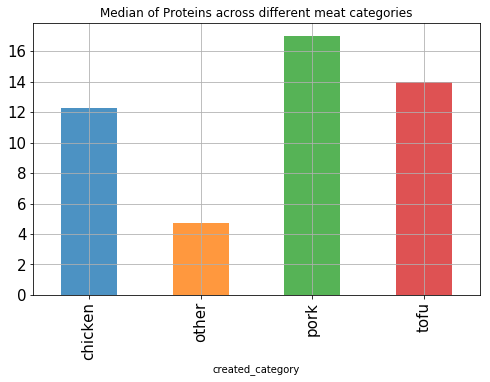

In [23]:
visdata=meatdata.groupby('created_category')['proteins_100g'].median()
visdata.plot(kind='bar',figsize=(8,5),alpha = 0.8,fontsize=15)
plt.title('Median of Proteins across different meat categories')
plt.grid()
plt.show()

Automation Using Luigi - Building a Pipeline for the Workflow

In [49]:
'''
Filename: luigi_ML_pipeline.py
Building a pipe line using Luigi.
Here we write the components in the Pipeline and define how to interact as a job scheduler.
The files for pre-processing or feature Engineering,training Model building,Predictions etc shall be refeered from here
'''
import luigi
from Pre_Processor import PreProcessor

class StoreDataIngestion(luigi.Task):

    def run(self):
        df_stores_data =pd.DataFrame.from_csv('https://s3-ap-southeast-2.amazonaws.com/vibrato-data-test-public-datasets-01/world-food-facts.zip',sep='\t')
        df_stores_data.to_csv(self.output().path, index=False)
    def output(self):
        return luigi.LocalTarget("en.openfoodfacts.org.products.tsv")
    
class DataPreProcessing(luigi.Task):

    def requires(self):
        return StoreDataIngestion()

    def run(self):
        pp = PreProcessor(pd.read_csv(StoreDataIngestion().output().path))
        dataframe = pp.DataPreprocessing()
        print "In Data Pre Processing"
        print dataframe.columns
        dataframe.to_csv(self.output().path, index=False)

    def output(self):
        return luigi.LocalTarget("clean_data.csv"),luigi.LocalTarget('Analysis.doc')

class Feature_Engineering:
    def requires(self):
        return DataPreProcessing()
    def run(self):
        fe = Query(pandas.read_csv(DataPreProcessing().output().path))
        dataframe = fe.Query()
        print "In Data Querying in progress"
    
    def output(self):
        return luigi.LocalTarget("Query.doc")


if __name__ == '__main__':
    luigi.run()




In [ ]:
'''
Filename: Pre_processor.py
Here we shall write the steps to clean the data.
And we return a cleaned data frame which can be used for Training in the pipeline.
We also return an analysis file to log the important aspects of the data

'''
class PreProcessor():
    def __init__(self,dataframe):
        self.dataframe=dataframe
        
    def DataPreProcessing:
        self.handle_index():
        self.handle_missing_values():
        self.handle_data_correction():
        
    
    def getmissingdata(self,self.percentage):
        self.percentage=percentage
        missingvalues = self.dataframe.loc[:, self.dataframe.isnull().mean() >= percentage/100]
        return(missingvalues)
    
    file = self.output().open('Analysis.doc)
    file.write('Number of Columns whose missing values are 100% :: \n',len(self.getmissingdata(data,100).columns))
    file.write('Number of Columns whose missing values are 90% :: \n',len(self.getmissingdata(data,190).columns)) 
    file.close() 
       
    def handle_missingvalues(self):
        self.dataframe['code'].fillna(0, inplace=True)#Imputing with zeros so that it could used as index
        self.dataframe[['product_name','brands','energy_100g']].fillna(0.00000001,inplace=True)# Imputing before grouping by
        self.dataframe['zinc_100g'].fillna(0,inplace=True)
        self.dataframe['categories_en'].fillna('Missing',inplace=True)
        self.dataframe['proteins_100g'].fillna(0,inplace=True)
    
    def handle_index(self):
        if self.dataframe.index.name is not None:
            self.dataframe.reset_index(inplace=True)
        else:
            self.dataframe.set_index('code', drop=True, append=False, inplace=True, verify_integrity=False) # Make 'code' as Index
                              
    def handle_data_correction(self):
        if (self.dataframe['zinc_100g'].dtype==np.float64 or self.dataframe['zinc_100g'].dtype==np.int64):
            self.convert_negativevalues_tozero(self.columnname==''zinc_100g'')
        
        else:
            self.convertdtype_tofloat(self.columnname='zinc_100g')
        
        self.dataframe['proteins_100g']=self.dataframe[self.dataframe['proteins_100g'].apply(self.convert_negativevalues_tozero)]
            self.dataframe['zinc_100g']=self.dataframe[self.dataframe['zinc_100g'].apply(self.convert_negativevalues_tozero)]
                              
                              
    def convert_negativevalues_tozero(self.ror):
            self.row=row
            if row<0:
               return 0
                            
    def convertdtype_tofloat(self.columnname):
            self.columnname=columnname
            self.dataframe[columnname]=self.dataframe[columnname].astype(float64)
                              
                
            
                              
        
        
    